# Trabalho de Probabilidade e Estatística

## Estimativa da Média Populacional
### Com Regressão Linear e KNN

Bibliotecas usadas:
- NumPy
- Pandas
- Scikit-Learn
- Matplotlib

In [4]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 169.8 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 139.9 kB/s eta 0:00:000:00:010:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

df = pd.read_csv('Trabalho.csv')
df = df[['Y', 'X1', 'X2', 'X3', 'X4']]
df.head(5)

,Y,X1,X2,X3,X4
0,1.448136,0.291702,2.587011,2.564149,2.233988
1,3.001715,0.517189,3.462381,3.414562,-1.518295
2,3.168068,0.607613,4.052388,3.974191,1.875687
3,2.522207,1.615740,1.999990,1.880660,1.234311
4,0.085236,-0.992394,2.667726,2.611272,2.660299


### Pré-processamento

#### Observando um Mapa de Calor da Correlação das Variáveis

<Axes: >

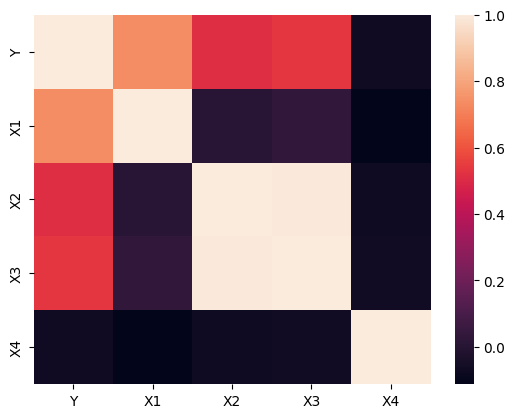

In [3]:
#-Pega todas as colunas, com exceção das 2 primeiras;
X = df.iloc[:, 1:].values
#-Pega somente a coluna Y
y = df['Y'].values

#-Mapa de Calor da Correlação das Variáveis
sns.heatmap(df.corr(), cbar=True)

#### Visualizando as Correlações em Scatterplots

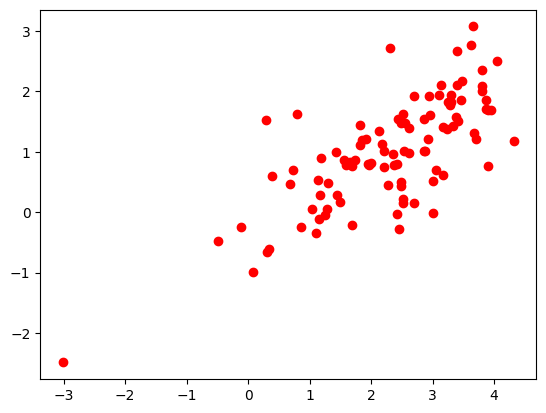

In [4]:
plt.scatter(y, df['X1'], color='red')

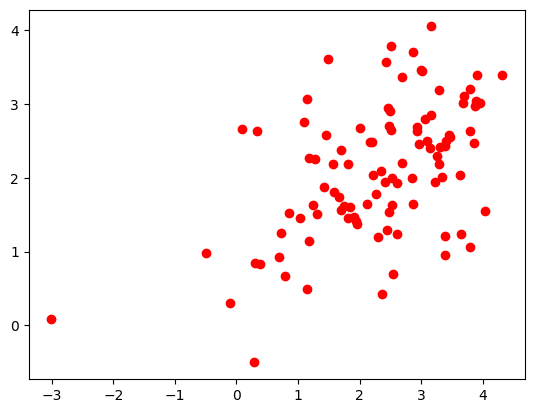

In [5]:
plt.scatter(y, df['X2'], color='red')

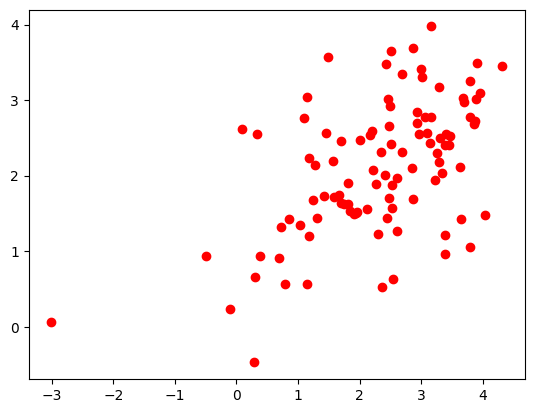

In [6]:
plt.scatter(y, df['X3'], color='red')

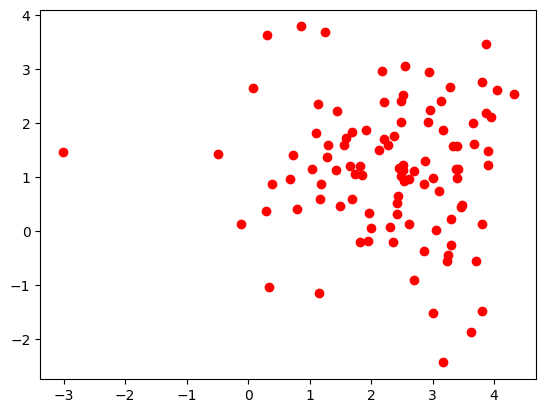

In [7]:
plt.scatter(y, df['X4'], color='red')

#### Organizando os Dados em Train/Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

#### Normalizando

In [ ]:
from sklearn.preprocessing import StandardScaler



### Regressão Linear

In [9]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_ = Pipeline([
    ("Escala", StandardScaler()),
    ("Modelo", LinearRegression())
])

grid_regression = GridSearchCV(estimator=pipe,
                   cv=3)

grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)

LinearRegression()

#### Testando o Modelo e Plotando o Gráfico das Previsões:

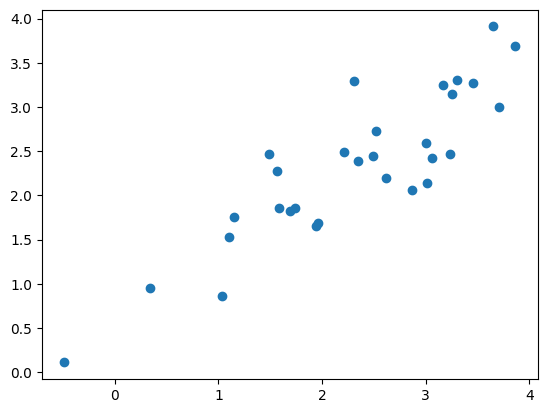

In [44]:
y_pred_regression = regression_model.predict(X_test)
plt.scatter(y_test, y_pred_regression)

Text(0.5, 1.0, 'Erro no Modelo de Regressão Linear')

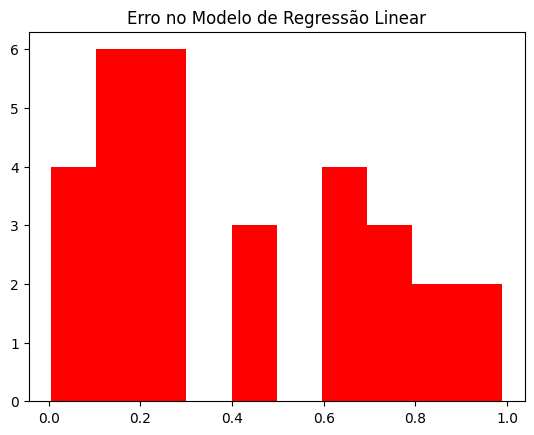

In [38]:
erro_regression = np.array([abs(value - prediction) for value, prediction in zip(y_test, y_pred_regression)])
plt.hist(erro_regression, color='red')
plt.title("Erro no Modelo de Regressão Linear")

In [47]:
t_score = t.ppf(0.975, df = len(erro_regression)-1)
intervalo_positivo = erro_regression.mean() - t_score * (np.std(erro_regression) / np.sqrt(len(erro_regression)))
intervalo_negativo = erro_regression.mean() + t_score * (np.std(erro_regression) / np.sqrt(len(erro_regression)))
print(f"ERRO MÉDIO - ESTIMATIVA PONTUAL: {round(erro_regression.mean(), 3)}")
print(f"INTERVALO DE CONFIANÇA: {round(intervalo_positivo, 3)} - {round(intervalo_negativo, 3)}")

ERRO MÉDIO - ESTIMATIVA PONTUAL: 0.408
INTERVALO DE CONFIANÇA: 0.298 - 0.518


### KNN (K-Nearest Neighbors)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

#### Set Up do Pipeline, Grid e Fitting 

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("Escala", StandardScaler()),
    ("Modelo", KNeighborsRegressor())
])

grid = GridSearchCV(estimator=pipe,
                   param_grid={'Modelo__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                   cv=3)

grid.fit(X_train, y_train)
best_k = grid.best_params_['Modelo__n_neighbors']
print(f"O melhor valor de K encontrado é: {best_k}")
pd.DataFrame(grid.cv_results_)

O melhor valor de K encontrado é: 4


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Modelo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002546,0.000141,0.002530,0.000956,1,{'Modelo__n_neighbors': 1},0.344193,0.329489,0.577176,0.416953,0.113454,10
1,0.001779,0.000133,0.001528,0.000315,2,{'Modelo__n_neighbors': 2},0.489247,0.539310,0.630703,0.553087,0.058565,5
2,0.001215,0.000002,0.001479,0.000428,3,{'Modelo__n_neighbors': 3},0.418675,0.645341,0.599703,0.554573,0.097884,4
3,0.001120,0.000189,0.001159,0.000331,4,{'Modelo__n_neighbors': 4},0.501002,0.618992,0.602150,0.574048,0.052107,1
4,0.001067,0.000025,0.001021,0.000190,5,{'Modelo__n_neighbors': 5},0.528390,0.564168,0.582183,0.558247,0.022356,3
5,0.000918,0.000006,0.000866,0.000069,6,{'Modelo__n_neighbors': 6},0.564527,0.537228,0.577133,0.559629,0.016655,2
6,0.000907,0.000042,0.000823,0.000039,7,{'Modelo__n_neighbors': 7},0.580543,0.491308,0.565127,0.545659,0.038944,8
7,0.001042,0.000175,0.000909,0.000102,8,{'Modelo__n_neighbors': 8},0.538546,0.478876,0.551551,0.522991,0.031643,9
8,0.001290,0.000362,0.001036,0.000213,9,{'Modelo__n_neighbors': 9},0.603625,0.492508,0.553227,0.549786,0.045428,6
9,0.000990,0.000117,0.001101,0.000353,10,{'Modelo__n_neighbors': 10},0.569542,0.544619,0.527121,0.547094,0.017406,7


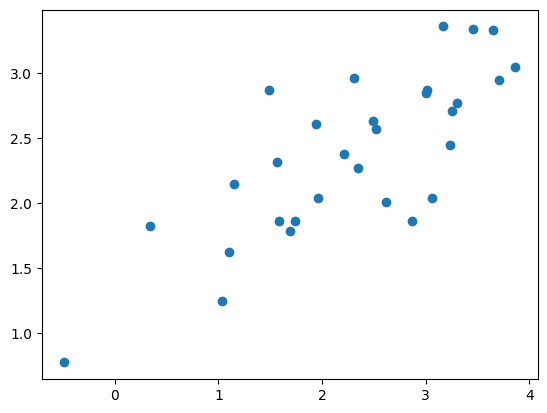

In [43]:
y_pred_knn = grid.predict(X_test)
plt.scatter(y_test, y_pred_knn)

Text(0.5, 1.0, 'Erro no Modelo de KNN')

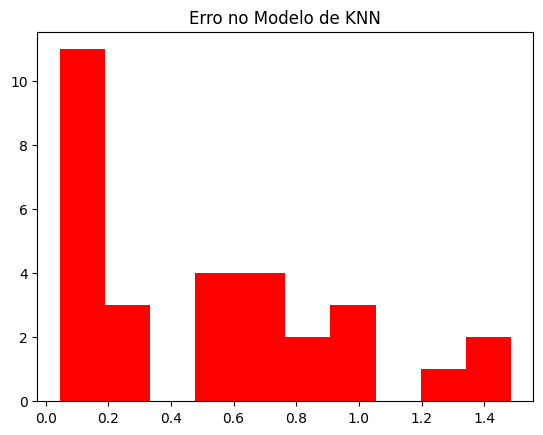

In [45]:
erro_knn = np.array([abs(value - prediction) for value, prediction in zip(y_test, y_pred_knn)])
plt.hist(erro_knn, color='red')
plt.title("Erro no Modelo de KNN")

In [50]:
t_score = t.ppf(0.975, df = len(erro_knn)-1)
intervalo_positivo = erro_knn.mean() - t_score * (np.std(erro_knn) / np.sqrt(len(erro_knn)))
intervalo_negativo = erro_knn.mean() + t_score * (np.std(erro_knn) / np.sqrt(len(erro_knn)))
print(f"ERRO MÉDIO: {round(erro_knn.mean(), 3)}")
print(f"INTERVALO DE CONFIANÇA: {round(intervalo_positivo, 3)} - {round(intervalo_negativo, 3)}")

ERRO MÉDIO: 0.531
INTERVALO DE CONFIANÇA: 0.375 - 0.687
